# KIN 471 - Fitbit Sleep Analysis
## This is a script to visualize sleep data exported from your Fitbit. Unless otherwise requested, do not change the code within the code boxes.

### These are the libraries we are importing. They have special functions that have additional functionality beyond the built-in functions within Python. 
- pandas allows us to work with data
- matplotlib allows us to visualize our data (and save the figures as images!)
- seaborn allows us to visualize our data

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

### This opens up the .csv we previously created and imports the data into a pandas dataframe.

In [60]:
name = input('Copy and paste the name of the .csv file that was created \(including .csv, ex. myfilename.csv):')
df = pd.read_csv(name)

Copy and paste the name of the .csv file that was created \(including .csv, ex. myfilename.csv): letest.csv


### First 5 rows of your dataframe

In [61]:
df.head(5)

,dateOfSleep,minutesAsleep,timeInBed,restless,awake,asleep
0,2017-05-31,394,459,61.0,4.0,394
1,2017-06-01,378,460,78.0,4.0,378
2,2017-06-07,409,457,44.0,4.0,409
3,2017-06-08,386,418,29.0,3.0,386
4,2018-04-17,389,426,37.0,NaN,389


### This turns the dateOfSleep column into our dataframe's index

In [62]:
df.index = df['dateOfSleep']
del df['dateOfSleep']

### See the difference?

In [63]:
df.head(5)

,minutesAsleep,timeInBed,restless,awake,asleep
dateOfSleep,,,,,
2017-05-31,394,459,61.0,4.0,394
2017-06-01,378,460,78.0,4.0,378
2017-06-07,409,457,44.0,4.0,409
2017-06-08,386,418,29.0,3.0,386
2018-04-17,389,426,37.0,NaN,389


### Plotting our data... but something looks off...
- Time is in minutes
- This looks really messy!

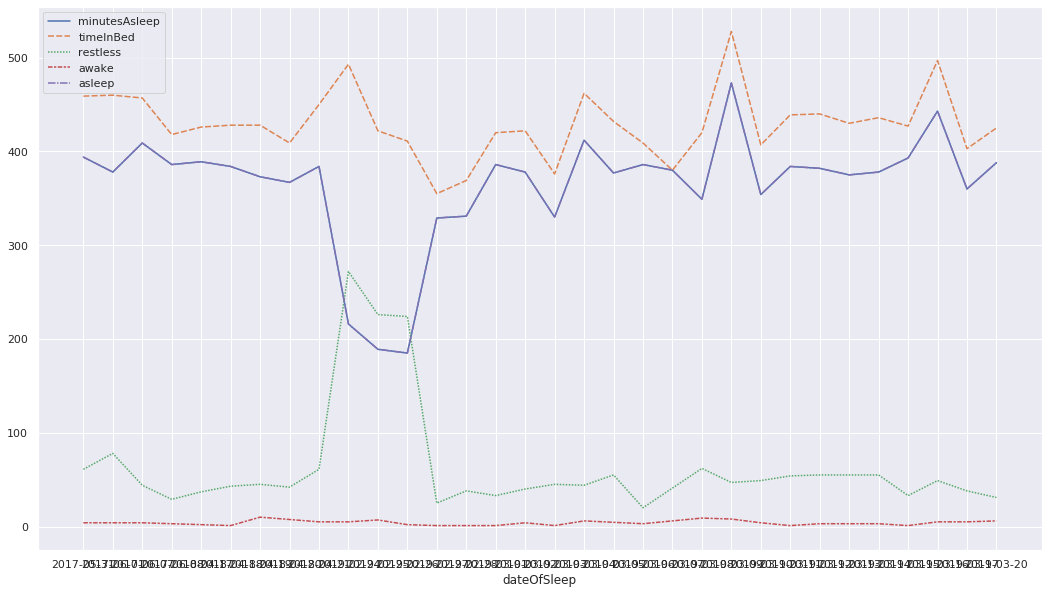

In [64]:
sns.set()
fig, ax = plt.subplots(figsize=(18,10))
sns.lineplot(ax=ax, data=df)

### To solve problem 2, we can specify a certain date we want to show our data from!

Choose a date, format YYYY-MM-DD 2018-01-01


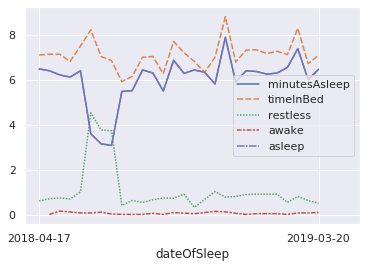

In [68]:
date = input('Choose a date, format YYYY-MM-DD')
g = sns.lineplot(data=df[df.index >= date])
g.set_xticks(range(len(df)))
my_xticks = ax.get_xticks()
plt.xticks([my_xticks[0], my_xticks[-1]], visible=True, rotation="horizontal")
plt.savefig(date+'.png')

### To solve problem 2, we can just divide minutes by 60 - that gets us hours!

In [66]:
df = df.div(60)

### Same code as before, but in hours!

Choose a date, format YYYY-MM-DD 2018-01-01


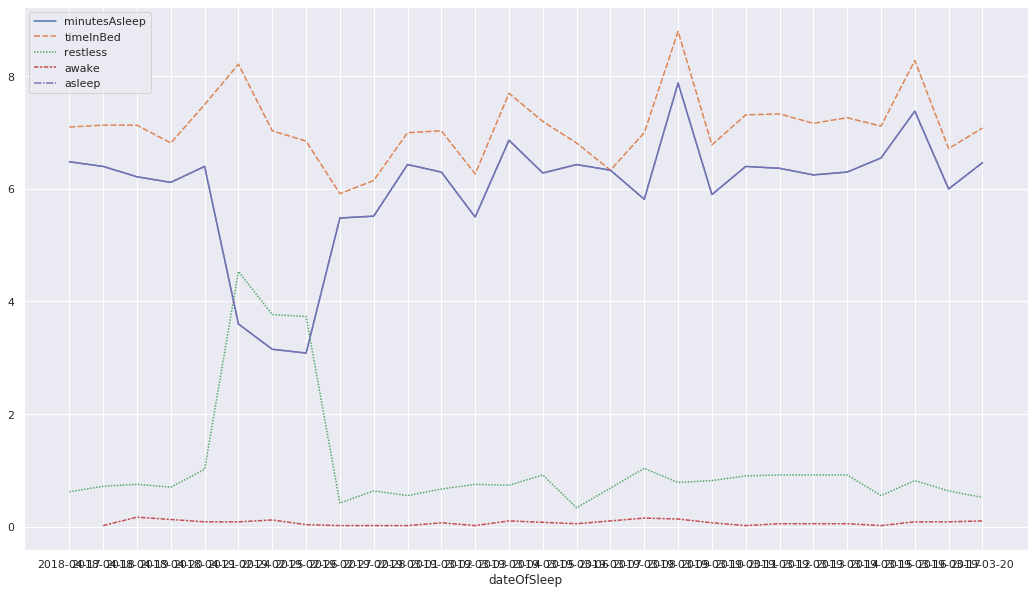

In [67]:
date = input('Choose a date, format YYYY-MM-DD')
fig, ax = plt.subplots(figsize=(18,10))
sns.lineplot(ax=ax, data=df[df.index >= date]) 
plt.savefig(date+'-min.png')